In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from sns_toolbox.neurons import SpikingNeuron
from sns_toolbox.connections import SpikingSynapse
from sns_toolbox.networks import Network
from sns_toolbox.renderer import render

import numpy as np
import matplotlib.pyplot as plt

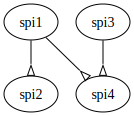

In [2]:
spi = SpikingNeuron(
    threshold_proportionality_constant=0.0,
    threshold_initial_value=1.0
)
spiC1 = SpikingSynapse(
    reversal_potential=2.0,
    max_conductance=1.0
)
spiC2 = SpikingSynapse(
    reversal_potential=2.0,
    max_conductance=2.0
)
spiC3 = SpikingSynapse(
    reversal_potential=2.0,
    max_conductance=3.0
)

net = Network()

net.add_neuron(neuron_type=spi, name='spi1')
net.add_neuron(neuron_type=spi, name='spi2')
net.add_neuron(neuron_type=spi, name='spi3')
net.add_neuron(neuron_type=spi, name='spi4')
net.add_connection(connection_type=spiC1, source='spi1', destination='spi4')
# net.add_connection(connection_type=spiC2, source='spi2', destination='spi4')
net.add_connection(connection_type=spiC3, source='spi3', destination='spi4')

net.add_connection(connection_type=spiC2, source='spi1', destination='spi2')

model = net.compile(dt=0.01, backend='numpy', debug=False)

render(net)

In [3]:
ar1 = model.__dict__.get('g_max_spike')
print(ar1)

[[0. 0. 0. 0.]
 [2. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 3. 0.]]


To match the required matrix for updating the relative connection values, the conductance values would need to be placed in an nxn matrix where n is the total number of neurons in the system.

In [4]:
g_update = np.zeros([net.get_num_neurons(), net.get_num_neurons()]) + ar1

print(g_update)

if g_update.shape == g_update.shape:
    print(1)

[[0. 0. 0. 0.]
 [2. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 3. 0.]]
1
